In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot
import seaborn as sns

In [2]:
# df = pd.read_csv("../../skillfactory_2_year_data/Временные ряды./train.zip")

In [3]:
# df_1 = df[df.store_nbr==25].groupby("date")['unit_sales'].sum().reset_index().copy()
# del df

In [4]:
# df_1.to_csv('../../skillfactory_2_year_data/Временные ряды./25_groucery.csv', index=False)

In [5]:
df_1 = pd.read_csv('../../skillfactory_2_year_data/Временные ряды./25_groucery.csv')

In [6]:
df_1

,date,unit_sales
0,2013-01-01,2511.619
1,2013-01-02,5316.224
2,2013-01-03,4442.913
3,2013-01-04,4844.354
4,2013-01-05,5817.526
...,...,...
1613,2017-08-11,22800.841
1614,2017-08-12,15090.753
1615,2017-08-13,8570.598
1616,2017-08-14,8244.854


In [7]:
# приводим индексы к стандарту pd.Datetime, чтобы потом это можно было скормить seasonal_decompose
df_1 = df_1.set_index(pd.DatetimeIndex(df_1['date'])) 
df_1.head() # смотрим на результат

,date,unit_sales
date,,
2013-01-01,2013-01-01,2511.619
2013-01-02,2013-01-02,5316.224
2013-01-03,2013-01-03,4442.913
2013-01-04,2013-01-04,4844.354
2013-01-05,2013-01-05,5817.526


In [8]:
df_1.drop(['date'], axis=1, inplace=True)
df_1.head()

,unit_sales
date,
2013-01-01,2511.619
2013-01-02,5316.224
2013-01-03,4442.913
2013-01-04,4844.354
2013-01-05,5817.526


In [9]:
len(df_1)

1618

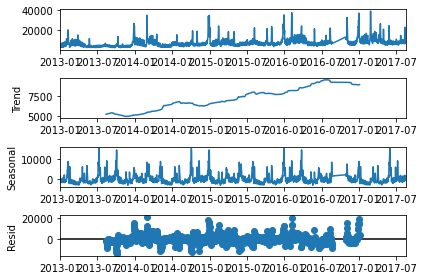

In [10]:
decomposition = seasonal_decompose(df_1,period=450)
decomposition.plot()
pyplot.show()

In [11]:
trend_part = decomposition.trend # отдельно трендовая составляющаяя
seasonal_part = decomposition.seasonal # отдельно сезонная составляющаяя
residual_part = decomposition.resid # отдельно шум: то, что осталось

In [12]:
# посмотрим повнимательнее на остатки в начале ряда
residual_part.head()

date
2013-01-01   NaN
2013-01-02   NaN
2013-01-03   NaN
2013-01-04   NaN
2013-01-05   NaN
Name: resid, dtype: float64

In [13]:
# посмотрим повнимательнее на остатки в конце ряда
residual_part.tail()

date
2017-08-11   NaN
2017-08-12   NaN
2017-08-13   NaN
2017-08-14   NaN
2017-08-15   NaN
Name: resid, dtype: float64

In [14]:
# в конце и в начале стоят значения NaN. Это связано с особенностями алгоритма seasonal_decompose
# если мы хотим далее анализировать остатки, необходимо избавиться от этих некорректных значений
residual_part = residual_part.dropna()
residual_part.head()

date
2013-08-14   -2103.225358
2013-08-15   -2256.596928
2013-08-16   -6496.219496
2013-08-17   -8891.166912
2013-08-18   -7211.478866
Name: resid, dtype: float64

1. Сколько элементов содержит исходный датасет?


In [15]:
len(df_1)

1618

2. Сколько элементов содержит шумовая часть?

In [16]:
len(df_1)

1618

3. Сколько числовых элементов содержит шумовая часть?

In [17]:
print(len(residual_part))

1168


4. Сколько элементов содержит сезонная часть?

In [18]:
len(seasonal_part)

1618

5. Сколько числовых элементов содержит трендовая часть?

In [19]:
trend_part = trend_part.dropna()

In [20]:
len(trend_part)

1168

## Выполните тест Дики-Фуллера.

In [21]:
from statsmodels.tsa.stattools import adfuller

In [22]:
test = adfuller(df_1['unit_sales'])

In [23]:
test

(-4.858992665318178,
 4.188394192907814e-05,
 25,
 1592,
 {'1%': -3.4344642432857992,
  '5%': -2.8633571955690647,
  '10%': -2.5677374399794197},
 29431.756744370145)

In [24]:
print ('adf: ', test[0] )
print ('p-value: ', test[1])
print ('Critical values: ', test[4])
if test[0]> test[4]['5%']: # проверка, больше ли критического полученное значение для нашего ряда 
    print ('ряд не стационарен')
else:
    print ('ряд стационарен')

adf:  -4.858992665318178
p-value:  4.188394192907814e-05
Critical values:  {'1%': -3.4344642432857992, '5%': -2.8633571955690647, '10%': -2.5677374399794197}
ряд стационарен


Разбейте временной ряд, полученный в предыдущем юните, на три (train + test) набора. 
Для этого воспользуйтесь TimeSeriesSplit из sklearn.model_selection с параметром n_splits=3 и test_size=7. 
Наборы данных можно получить, вызвав метод split (временной ряд) у инициализированного TimeSeriesSplit.

Выведите размеры полученных подвыборок.

In [25]:
from sklearn.model_selection import TimeSeriesSplit 

In [26]:
tscv = TimeSeriesSplit()

In [27]:
train_test_groups = tscv.split(df_1)

In [28]:
for train_index, test_index in train_test_groups:
    print("TRAIN size:", len(train_index), "TEST size:", len(test_index))

TRAIN size: 273 TEST size: 269
TRAIN size: 542 TEST size: 269
TRAIN size: 811 TEST size: 269
TRAIN size: 1080 TEST size: 269
TRAIN size: 1349 TEST size: 269


# "Оконные функции"

In [29]:
import matplotlib.pyplot as plt 
%matplotlib inline

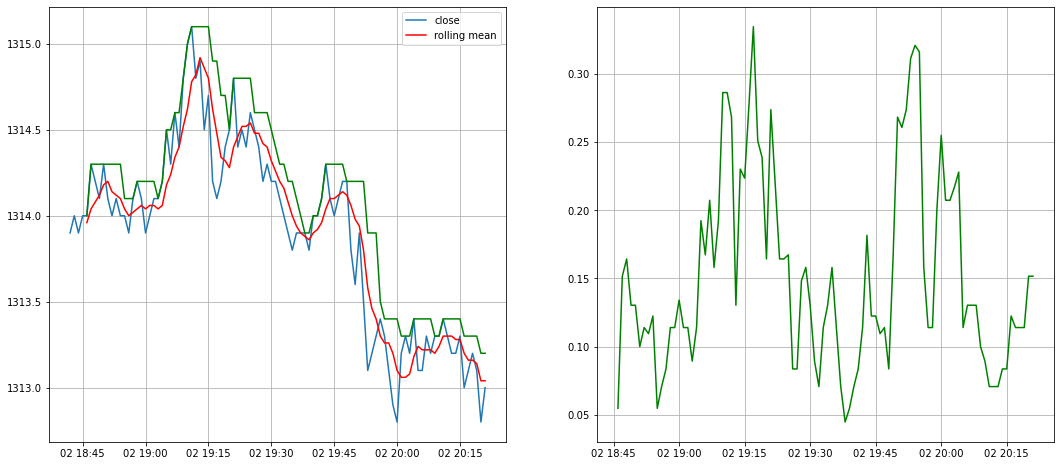

,ts,open,high,low,close,vol,rolling_mean,rolling_std,rolling_max
0,2018-01-02 18:42:00,1314.3,1314.4,1313.9,1313.9,323,NaN,NaN,NaN
1,2018-01-02 18:43:00,1314.0,1314.2,1314.0,1314.0,177,NaN,NaN,NaN
2,2018-01-02 18:44:00,1314.0,1314.0,1313.7,1313.9,216,NaN,NaN,NaN
3,2018-01-02 18:45:00,1313.9,1314.1,1313.8,1314.0,170,NaN,NaN,NaN
4,2018-01-02 18:46:00,1314.0,1314.1,1314.0,1314.0,186,1313.96,0.054772,1314.0
5,2018-01-02 18:47:00,1314.0,1314.3,1314.0,1314.3,99,1314.04,0.151658,1314.3
6,2018-01-02 18:48:00,1314.3,1314.4,1314.2,1314.2,99,1314.08,0.164317,1314.3
7,2018-01-02 18:49:00,1314.2,1314.2,1314.1,1314.1,113,1314.12,0.130384,1314.3
8,2018-01-02 18:50:00,1314.2,1314.3,1314.1,1314.3,129,1314.18,0.130384,1314.3
9,2018-01-02 18:51:00,1314.4,1314.4,1314.1,1314.1,139,1314.20,0.100000,1314.3


In [30]:
df = pd.read_csv('../../skillfactory_2_year_data/Временные ряды/gold_clean.zip')
df['ts'] = pd.to_datetime(df.ts)
df = df.iloc[1000:1100]
df = df.reset_index(drop=True)

def myMax(value):
    return max(value)

## делаем оконное среднее с окном в 10 точек
df['rolling_mean'] = df.close.rolling(window=5).mean()
df['rolling_std']  = df.close.rolling(window=5).std()
df['rolling_max']  = df.close.rolling(window=5).apply(myMax, raw=False)

## визуализируем
f, ax = plt.subplots(1, 2, figsize=(18, 8))
ax[0].plot(df.ts, df.close) ## исходные данные
ax[0].plot(df.ts, df.rolling_mean, c='r') ## оконное среднее
ax[0].plot(df.ts, df.rolling_max,  c='g') ## оконный максимум
ax[0].legend(['close', 'rolling mean'])
ax[0].grid()

ax[1].plot(df.ts, df.rolling_std, c='g') ## оконное стандартное отклонение
ax[1].grid()
plt.show()

df.head(12)

# Cкользящее среднее

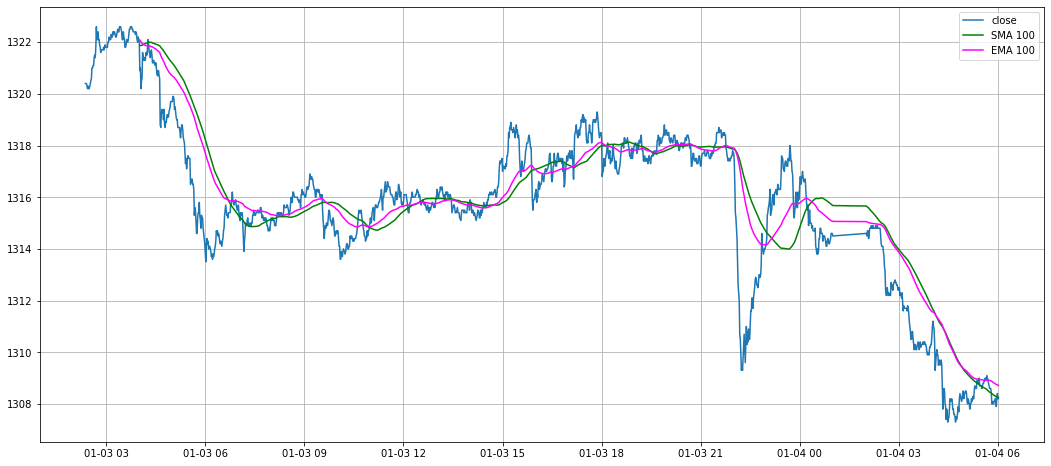

In [31]:
df = pd.read_csv('../../skillfactory_2_year_data/Временные ряды/gold_clean.zip')
df['ts'] = pd.to_datetime(df.ts)
df = df.iloc[1400:3000]

N = 100

## делаем оконное среднее с окном в N точек
df['rolling_mean_' + str(N)] = df.close.rolling(window=N).mean()
## экспоненциально среднее с окном в N точек
df['rolling_ema_' + str(N)] = df.close.ewm(min_periods=N, span=N).mean()

## визуализируем
f, ax = plt.subplots(1, 1, figsize=(18, 8))
ax.plot(df.ts, df.close) ## исходные данные
# ax.plot(df.ts, df.rolling_mean_10, c='r') ## оконное среднее
ax.plot(df.ts, df['rolling_mean_' + str(N)],  c='g') ## оконное среднее
ax.plot(df.ts, df['rolling_ema_'  + str(N)],  c='magenta') ## оконное среднее
ax.legend(['close', 'SMA ' + str(N), 'EMA ' + str(N)])
ax.grid()

# Лаги

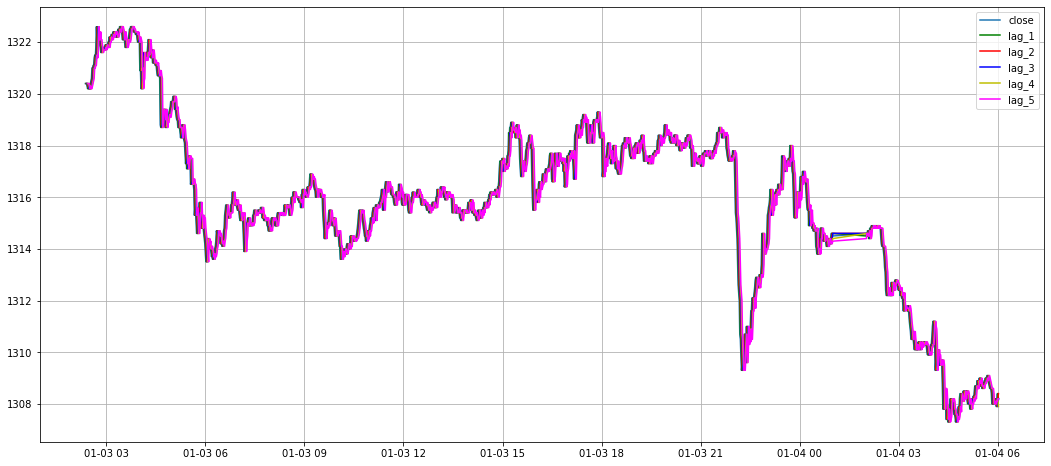

In [32]:
for i in range(1,6):
    df['lag_{}'.format(i)] = df.close.shift(i)


## визуализируем
f, ax = plt.subplots(1, 1, figsize=(18, 8))
ax.plot(df.ts, df.close) ## исходные данные
ax.plot(df.ts, df['lag_' + str(1)],  c='g') 
ax.plot(df.ts, df['lag_' + str(2)],  c='r') 
ax.plot(df.ts, df['lag_' + str(3)],  c='b') 
ax.plot(df.ts, df['lag_' + str(4)],  c='y') 
ax.plot(df.ts, df['lag_' + str(5)],  c='magenta') 
ax.legend(['close', 'lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5'])
ax.grid()

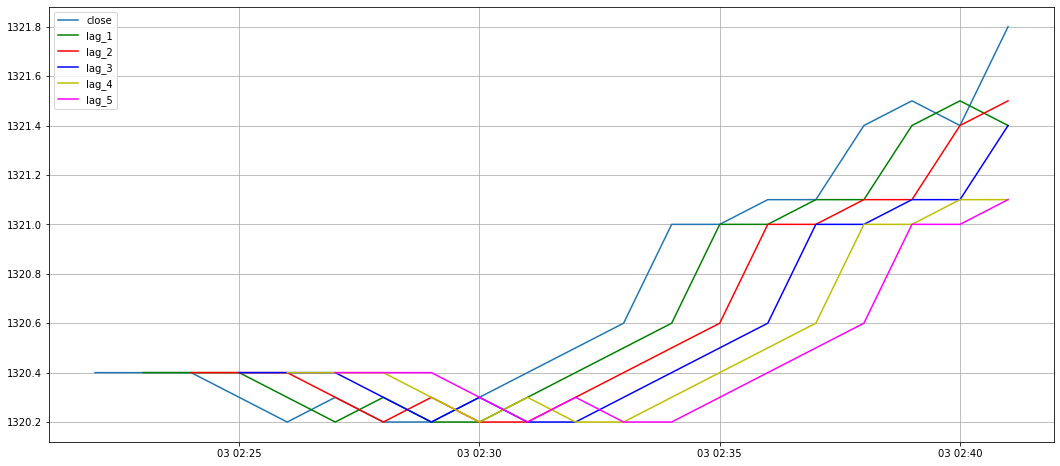

In [33]:
f, ax = plt.subplots(1, 1, figsize=(18, 8))
ax.plot(df.ts[:20], df.close[:20]) ## исходные данные
ax.plot(df.ts[:20], df['lag_' + str(1)][:20],  c='g') 
ax.plot(df.ts[:20], df['lag_' + str(2)][:20],  c='r') 
ax.plot(df.ts[:20], df['lag_' + str(3)][:20],  c='b') 
ax.plot(df.ts[:20], df['lag_' + str(4)][:20],  c='y') 
ax.plot(df.ts[:20], df['lag_' + str(5)][:20],  c='magenta') 
ax.legend(['close', 'lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5'])
ax.grid()

#### Выберите временной ряд для одного магазина (можно использовать из прошлого задания).

In [34]:
df_1.head()

,unit_sales
date,
2013-01-01,2511.619
2013-01-02,5316.224
2013-01-03,4442.913
2013-01-04,4844.354
2013-01-05,5817.526


#### Постройте скользящее среднее c окном 5.

In [35]:
df_1 = df_1.iloc[500:900]

In [36]:
n = 5

In [37]:
df_1['rolling_mean_' + str(n)] = df_1['unit_sales'].rolling(window=n).mean()

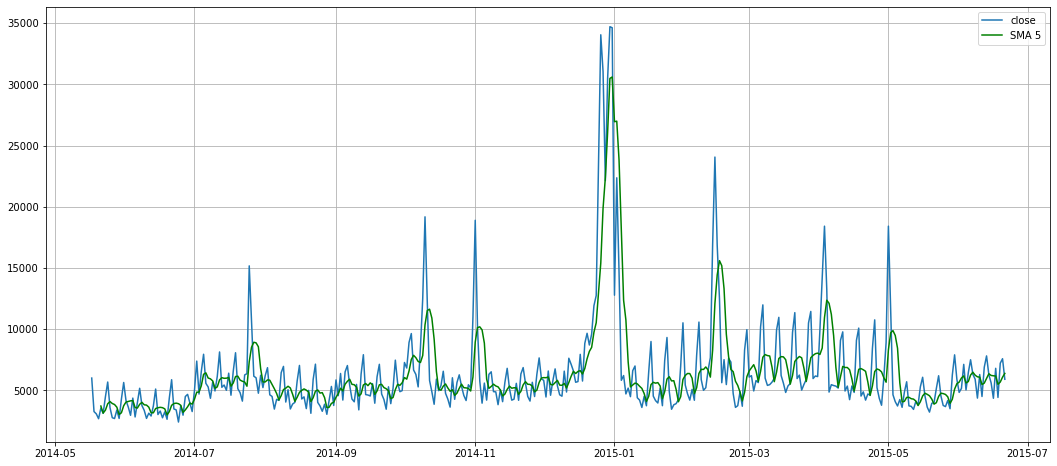

In [38]:
## визуализируем
f, ax = plt.subplots(1, 1, figsize=(18, 8))
ax.plot(df_1.index, df_1.unit_sales) ## исходные данные
ax.plot(df_1.index, df_1['rolling_mean_' + str(n)],  c='g') ## оконное среднее
ax.legend(['close', 'SMA ' + str(n), ])
ax.grid()

#### Постройте скользящее квадратическое отклонение c окном 5. 

In [39]:
df_1['rolling_std_' + str(n)] = df_1['unit_sales'].rolling(window=n).std()

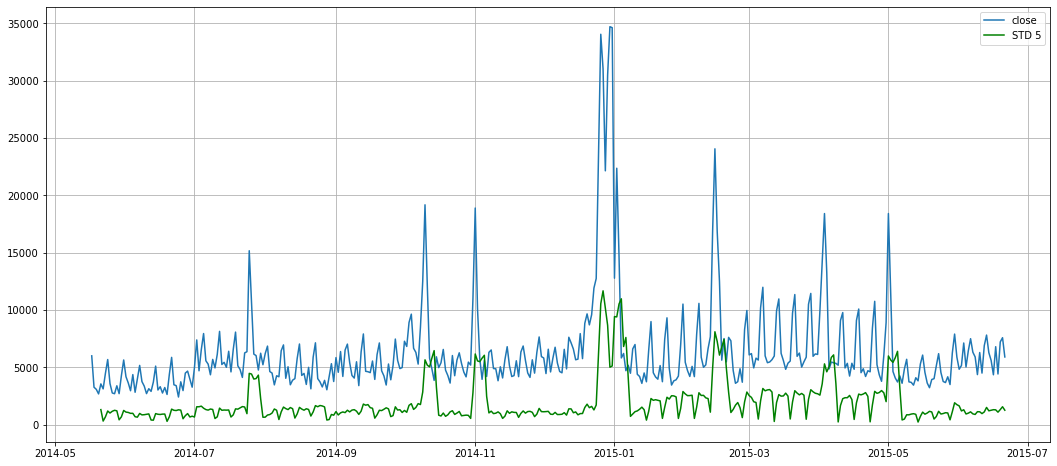

In [40]:
## визуализируем
f, ax = plt.subplots(1, 1, figsize=(18, 8))
ax.plot(df_1.index, df_1.unit_sales) ## исходные данные
ax.plot(df_1.index, df_1['rolling_std_' + str(n)],  c='g') ## оконное среднее
ax.legend(['close', 'STD ' + str(n), ])
ax.grid()

In [41]:
df_1['upper'] = df_1['rolling_mean_' + str(n)] + df_1['rolling_std_' + str(n)] * 3
df_1['lower'] = df_1['rolling_mean_' + str(n)] - df_1['rolling_std_' + str(n)] * 3

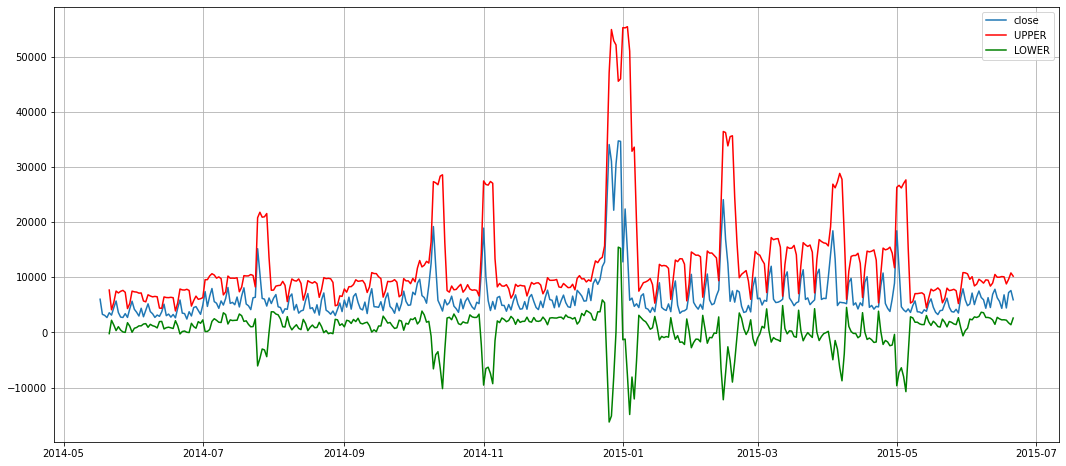

In [42]:
## визуализируем
f, ax = plt.subplots(1, 1, figsize=(18, 8))
ax.plot(df_1.index, df_1.unit_sales) ## исходные данные
ax.plot(df_1.index, df_1['upper'],  c='r') ## оконное среднее
ax.plot(df_1.index, df_1['lower'],  c='g') ## оконное среднее
ax.legend(['close', 'UPPER ', 'LOWER' ])
ax.grid()

#### Постройте скользящее среднее с окном в 10 точек.

In [43]:
n = 10
df_1['rolling_mean_' + str(n)] = df_1['unit_sales'].rolling(window=n).mean()

#### Постройте экспоненциально среднее с окном в 7 точек (span=7).

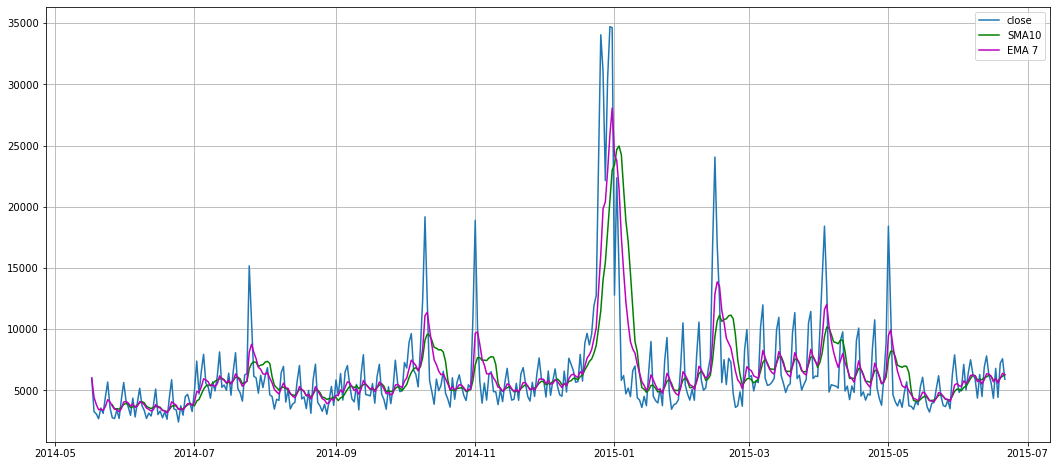

In [44]:

df_1['rolling_ema_' + str(n)] = df_1['unit_sales'].ewm( span=7).mean()


## визуализируем
f, ax = plt.subplots(1, 1, figsize=(18, 8))
ax.plot(df_1.index, df_1.unit_sales) ## исходные данные
ax.plot(df_1.index, df_1['rolling_mean_' + str(n)],  c='g') ## оконное среднее
ax.plot(df_1.index, df_1['rolling_ema_' + str(n)],  c='m') ## экспоненциальное среднее
ax.legend(['close', 'SMA' + str(n), 'EMA ' + str(7), ])
ax.grid()

#### Напишите свою скользящую функцию, которая будет являться средним арифметическим между максимальным и минимальным значением unit_sales, используя окно 10.

In [45]:
# df_2 = pd.read_csv('../../skillfactory_2_year_data/Временные ряды./25_groucery.csv')

In [46]:
n = 10
df_1['rolling_mean_max_min_' + str(n)] = df_1['unit_sales'].rolling(window=10).mean()


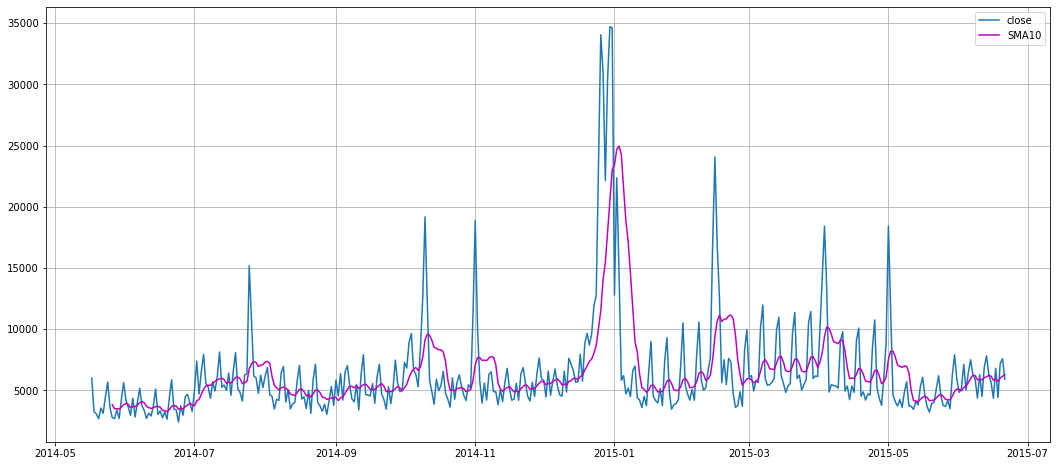

In [47]:
f, ax = plt.subplots(1, 1, figsize=(18, 8))
ax.plot(df_1.index, df_1.unit_sales) ## исходные данные
ax.plot(df_1.index, df_1['rolling_mean_max_min_' + str(n)],  c='m') ## оконное среднее
ax.legend(['close', 'SMA' + str(n), 'EMA ' + str(7), ])
ax.grid()

#### Постройте скользящее среднее с окном 50 и экспоненциальное скользящее среднее с окном 10 (span=10). Укажите индексы датафрейма, на которых одно скользящее пересекается с другим. Для этого вычтите из одно скользящего среднего другое, возьмите знак этой разности (np.sign), продифференциируйте его (diff()) и оставьте только те точки, где результат дифференциирования не равен нулю.

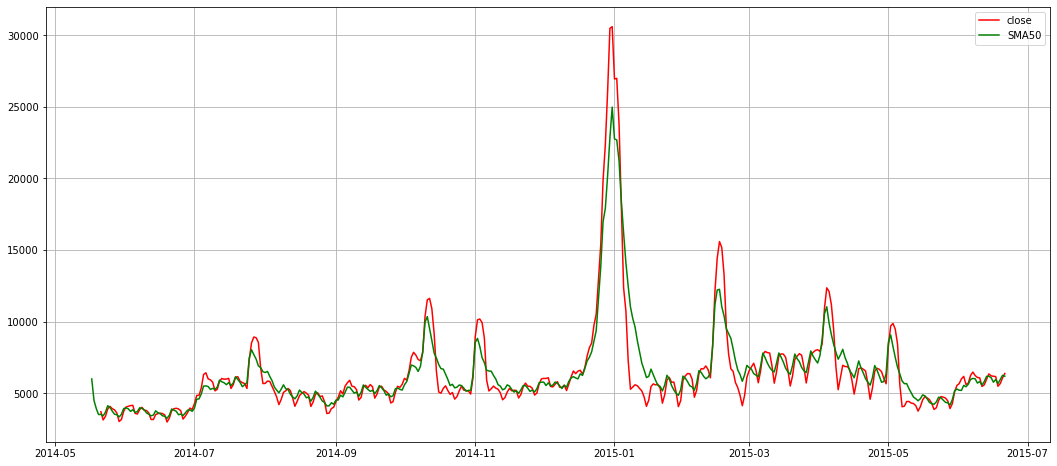

In [52]:
n = 50
df_1['rolling_mean_' + str(n)] = df_1['unit_sales'].rolling(window=5).mean()
df_1['rolling_ema_' + str(10)] = df_1['unit_sales'].ewm(span=10).mean()

f, ax = plt.subplots(1, 1, figsize=(18, 8))
# ax.plot(df_1.index, df_1.unit_sales) ## исходные данные
ax.plot(df_1.index, df_1['rolling_mean_' + str(n)],  c='r') ## оконное среднее
ax.plot(df_1.index, df_1['rolling_ema_' + str(10)],  c='g') ## оконное среднее
ax.legend(['close', 'SMA' + str(n), 'EMA ' + str(7), ])
ax.grid()

In [55]:
df_1['xxx'] = df_1['rolling_mean_' + str(n)] - df_1['rolling_ema_' + str(10)]

In [58]:
df_1.xxx.isna().sum()

4

In [59]:
! pip install python-twitter

In [60]:
! pip install -r requirements.txt

ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'
